<a href="https://colab.research.google.com/github/Mritunjay2103/Optical_Character_Recognition/blob/main/Optical_Character_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

In [ ]:
image = cv2.imread('digits.png')

In [ ]:
gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [ ]:
divisions = list(np.hsplit(i,100) for i in np.vsplit(gray_img,50))

In [ ]:
NP_array = np.array(divisions)

In [ ]:
train_data = NP_array[:,:50].reshape(-1,400).astype(np.float32)

In [ ]:
test_data = NP_array[:,50:100].reshape(-1,400).astype(np.float32)

In [ ]:
k = np.arange(10)
train_labels = np.repeat(k,250)[:,np.newaxis]
test_labels = np.repeat(k,250)[:,np.newaxis]

In [ ]:
knn = cv2.ml.KNearest_create()

In [ ]:
knn.train(train_data,
          cv2.ml.ROW_SAMPLE,
          train_labels)

True

In [ ]:
ret, output ,neighbours, distance = knn.findNearest(test_data, k = 3)

In [ ]:
matched = output==test_labels
correct_OP = np.count_nonzero(matched)

In [ ]:
accuracy = (correct_OP*100.0)/(output.size)

In [ ]:
print(accuracy)

91.64


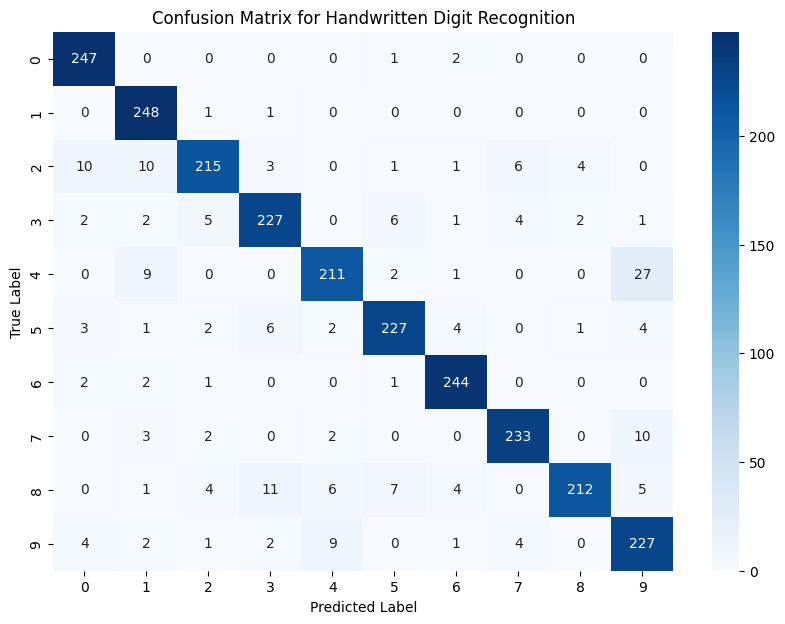

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, output)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Handwritten Digit Recognition")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, output, target_names=[str(i) for i in range(10)]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       250
           1       0.89      0.99      0.94       250
           2       0.93      0.86      0.89       250
           3       0.91      0.91      0.91       250
           4       0.92      0.84      0.88       250
           5       0.93      0.91      0.92       250
           6       0.95      0.98      0.96       250
           7       0.94      0.93      0.94       250
           8       0.97      0.85      0.90       250
           9       0.83      0.91      0.87       250

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500



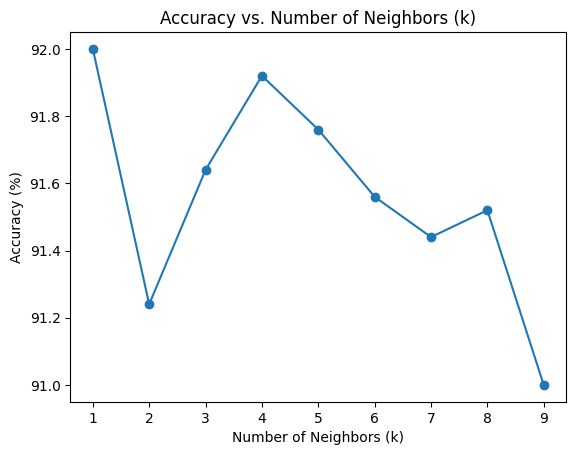

In [ ]:
accuracies = []
k_values = range(1, 10)

for k in k_values:
    ret, output, neighbours, distance = knn.findNearest(test_data, k)
    matched = output == test_labels
    correct_OP = np.count_nonzero(matched)
    accuracy = (correct_OP * 100.0) / output.size
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy vs. Number of Neighbors (k)")
plt.show()

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import numpy as np
import cv2
import gradio as gr

# Load the KNN model as previously defined
def load_knn_model():
    image = cv2.imread('digits.png')
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    divisions = list(np.hsplit(i, 100) for i in np.vsplit(gray_img, 50))
    NP_array = np.array(divisions)

    train_data = NP_array[:, :50].reshape(-1, 400).astype(np.float32)
    train_labels = np.repeat(np.arange(10), 250)[:, np.newaxis]

    knn = cv2.ml.KNearest_create()
    knn.train(train_data, cv2.ml.ROW_SAMPLE, train_labels)

    return knn

# Function to process the uploaded image and predict the digit
def predict_digit(image):
    knn = load_knn_model()
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (20, 20)).reshape(-1, 400).astype(np.float32)

    ret, result, neighbours, distance = knn.findNearest(resized_img, k=3)
    return int(result[0][0])

# Define the Gradio interface
iface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(type="numpy"),  # Removed shape argument
    outputs="label",
    title="Handwritten Digit OCR",
    description="Upload an image of a handwritten digit to predict its value."
)

# Launch the interface
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://31a1b4e5b858bc1735.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
